In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astsa import load_rec
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

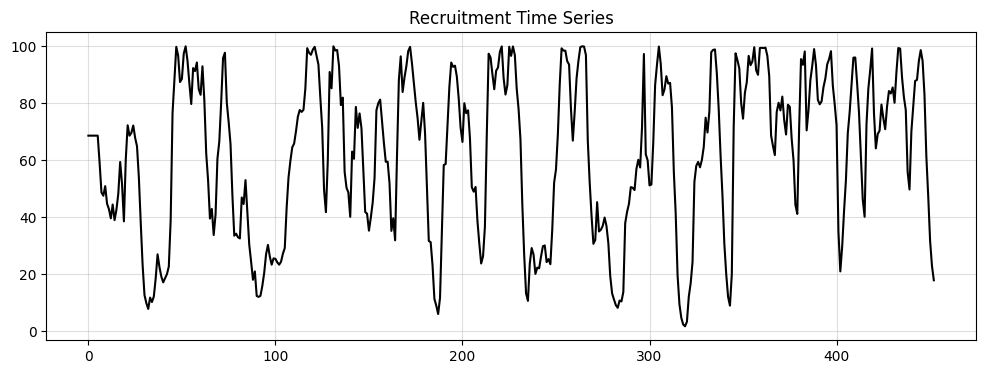

In [2]:
rec = load_rec()

y = rec["Value"].values

plt.figure(figsize=(12, 4))
plt.plot(y, color="black")
plt.title("Recruitment Time Series")
plt.grid(True, alpha=0.4)
plt.show()

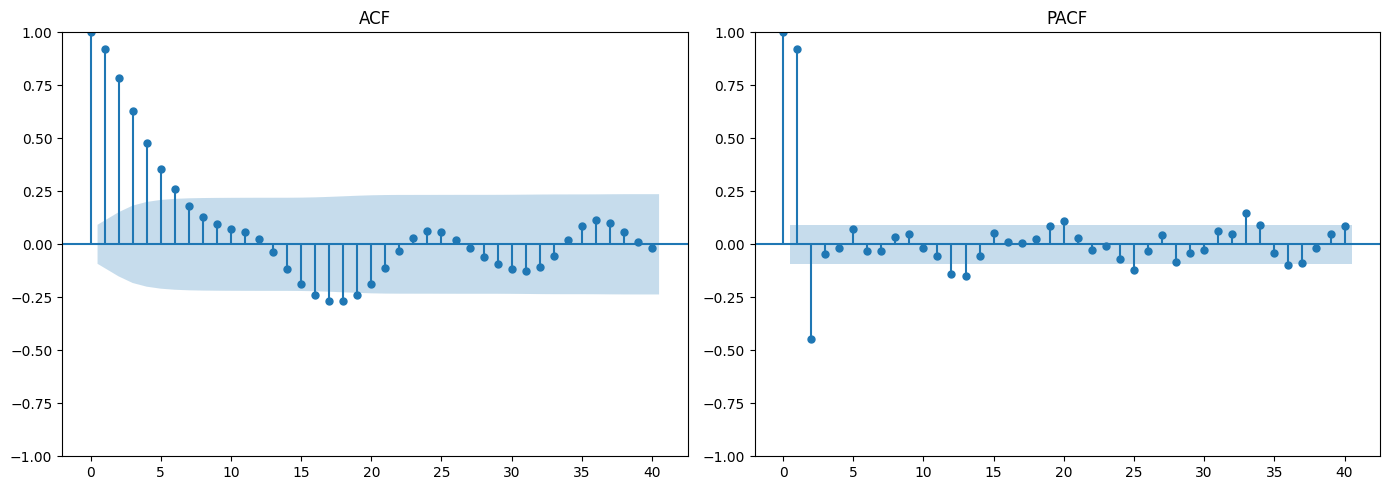

In [3]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_acf(y, lags=40, ax=plt.gca())
plt.title("ACF")

plt.subplot(1, 2, 2)
plot_pacf(y, lags=40, ax=plt.gca(), method="ywm")
plt.title("PACF")

plt.tight_layout()
plt.show()

In [4]:
p, q = 2, 1

model_mom = ARIMA(y, order=(p, 0, q)).fit(method="innovations_mle")
params_mom = model_mom.params

model_ml = ARIMA(y, order=(p, 0, q)).fit(method="statespace")
params_ml = model_ml.params

model_ols = ARIMA(y, order=(p, 0, q)).fit(method="hannan_rissanen")
params_ols = model_ols.params

params_table = pd.DataFrame({
    "MoM": params_mom,
    "ML": params_ml,
    "OLS": params_ols
})

print("\nEstimated Parameters:\n")
print(params_table)

forecast_mom = model_mom.forecast(steps=24)
forecast_ml = model_ml.forecast(steps=24)
forecast_ols = model_ols.forecast(steps=24)


Estimated Parameters:

         MoM         ML        OLS
0  61.925491  61.925279  61.928937
1   1.425758   1.425731   1.460344
2  -0.530157  -0.530129  -0.559751
3  -0.094952  -0.094934  -0.141013
4  89.164866  89.164534  90.826748


In [5]:
forecast_df = pd.DataFrame({
    "MoM Forecast": forecast_mom,
    "ML Forecast": forecast_ml,
    "OLS Forecast": forecast_ols
})

print("\n24-Month Forecast:\n")
print(forecast_df)


24-Month Forecast:

    MoM Forecast  ML Forecast  OLS Forecast
0      20.240933    20.240917     20.058583
1      25.849748    25.849577     25.445825
2      32.589592    32.589124     32.087993
3      39.225424    39.224593     38.772332
4      45.113334    45.112156     44.815811
5      49.990035    49.988582     49.899806
6      53.821509    53.819885     53.941348
7      56.698845    56.697158     56.997622
8      58.769946    58.768290     59.198577
9      60.197392    60.195841     60.701979
10     61.134576    61.133177     61.665476
11     61.714002    61.712780     62.230984
12     62.043269    62.042229     62.517502
13     62.205536    62.204670     62.619373
14     62.262326    62.261617     62.607762
15     62.257269    62.256693     62.533783
16     62.219950    62.219484     62.432248
17     62.169424    62.169044     62.325381
18     62.117170    62.116855     62.226153
19     62.069457    62.069188     62.141065
20     62.029131    62.028895     62.072350
21     61.9

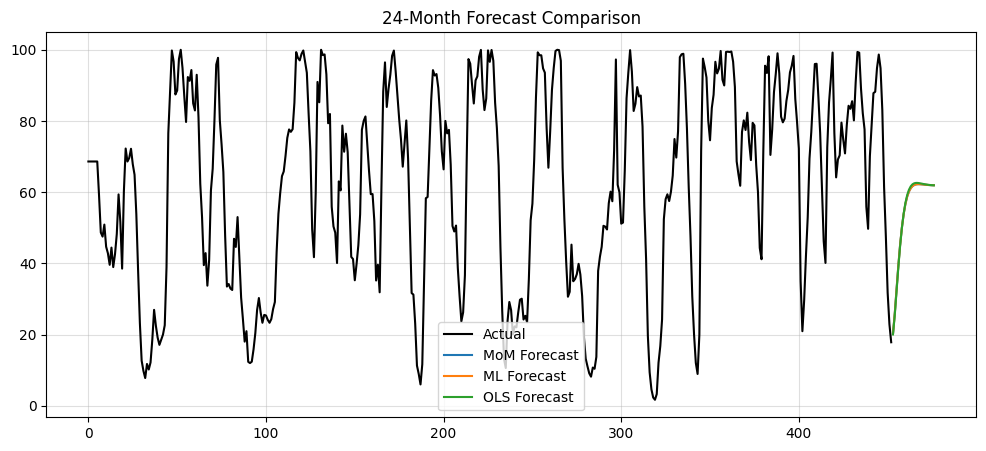

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(y, label="Actual", color="black")
plt.plot(np.arange(len(y), len(y) + 24), forecast_mom, label="MoM Forecast")
plt.plot(np.arange(len(y), len(y) + 24), forecast_ml, label="ML Forecast")
plt.plot(np.arange(len(y), len(y) + 24), forecast_ols, label="OLS Forecast")
plt.legend()
plt.title("24-Month Forecast Comparison")
plt.grid(True, alpha=0.4)
plt.show()

In [8]:
res_mom = y - model_mom.fittedvalues
res_ml = y - model_ml.fittedvalues
res_ols = y - model_ols.fittedvalues

rmse_mom = np.sqrt(mean_squared_error(y[p+q:], model_mom.fittedvalues[p+q:]))
rmse_ml = np.sqrt(mean_squared_error(y[p+q:], model_ml.fittedvalues[p+q:]))
rmse_ols = np.sqrt(mean_squared_error(y[p+q:], model_ols.fittedvalues[p+q:]))

mae_mom = mean_absolute_error(y[p+q:], model_mom.fittedvalues[p+q:])
mae_ml = mean_absolute_error(y[p+q:], model_ml.fittedvalues[p+q:])
mae_ols = mean_absolute_error(y[p+q:], model_ols.fittedvalues[p+q:])

final_metrics = pd.DataFrame({
    "RMSE": [rmse_mom, rmse_ml, rmse_ols],
    "MAE": [mae_mom, mae_ml, mae_ols]
}, index=["MoM", "ML", "OLS"])

print("\nFinal Error Comparison:\n")
print(final_metrics)

best_model = final_metrics["MAE"].idxmin()
print("\nBest Estimator Based on RMSE:", best_model)


Final Error Comparison:

         RMSE       MAE
MoM  9.473451  7.114329
ML   9.473451  7.114322
OLS  9.475776  7.109157

Best Estimator Based on RMSE: OLS
